# Within dataset varifold distances

Here we use a varifold metric to compute pairwise distances between meshes in a dataset.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import polpo.preprocessing.dict as ppdict
from polpo.mesh.surface import PvSurface
from polpo.mesh.varifold.tuning import SigmaFromLengths
from polpo.preprocessing.load.pregnancy.jacobs import MeshLoader

[KeOps] Warning : CUDA was detected, but driver API could not be initialized. Switching to CPU only.


In [2]:
mesh_loader = (
    MeshLoader(
        subject_subset=["01"],
        struct_subset=["L_Hipp"],
        derivative="enigma",
        as_mesh=True,
    )
    + ppdict.ExtractUniqueKey(nested=True)
    + ppdict.DictMap(PvSurface)
)

meshes = mesh_loader()

We select the varifold kernel [using characteristic lengths](../how_to/varifold_kernel_charlen.ipynb).

In [3]:
sigma_search = SigmaFromLengths(
    ratio_charlen_mesh=2.0,
    ratio_charlen=0.25,
)

sigma_search.fit([meshes[1]])

metric = sigma_search.optimal_metric_

sigma_search.sigma_

np.float64(5.548036739288476)

In [4]:
dists = []
for mesh in meshes.values():
    dists_ = []
    dists.append(dists_)
    for cmp_mesh in meshes.values():
        dists_.append(metric.dist(mesh, cmp_mesh))

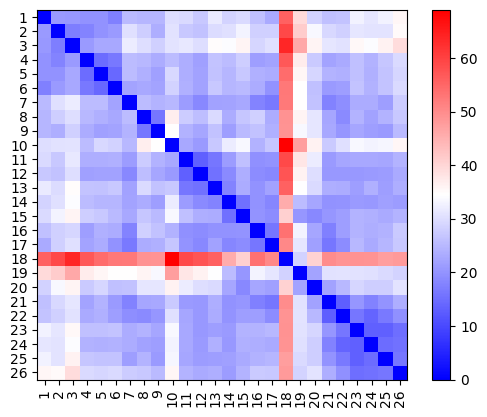

In [36]:
fig, ax = plt.subplots()

im = ax.imshow(dists, cmap="bwr")

plt.colorbar(im)

ax.set_xticks(range(len(meshes)))
ax.set_xticklabels(meshes.keys(), rotation=90)

ax.set_yticks(range(len(meshes)))
ax.set_yticklabels(meshes.keys());

(np.float64(12.870735508410826), np.float64(69.00952156307977))

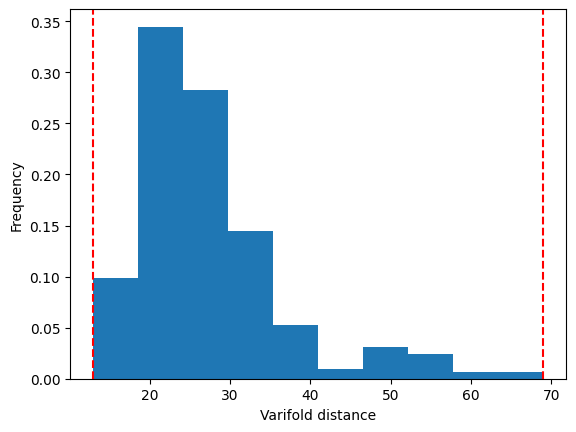

In [34]:
dists_ = np.array(dists)[np.triu_indices(len(dists), k=1)]

_, ax = plt.subplots()

ax.hist(
    dists_,
    weights=1 / len(dists_) * np.ones_like(dists_),
)
ax.set_xlabel("Varifold distance")
ax.set_ylabel("Frequency")

min_dist, max_dist = np.amin(dists_), np.amax(dists_)
ax.axvline(min_dist, color="red", linestyle="--")
ax.axvline(max_dist, color="red", linestyle="--")

min_dist, max_dist

## Further reading

* [How much decimation is too much? A varifold perspective](./varifold_decimation_charlen_dist.ipynb)